In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import matplotlib.pyplot as plt

2023-06-23 09:15:40.969418: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
CURRENT_DIR = Path('.').resolve()
MODULES_DIR = CURRENT_DIR.parent.joinpath('src')
sys.path.append(str(MODULES_DIR))
DATA_DIR = CURRENT_DIR.parent.joinpath('Data','Process','data.csv')

-------

# Upload process data

In [4]:
df = pd.read_csv(str(DATA_DIR), index_col=0)
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,-5.551115e-17,-3.492577e-16,6.927329e-16,7.887209e-16,-3.376928e-16,3.561966e-16,2.451743e-16,1.838807e-16,0.348958
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,-1.141852e+00,-2.554131e+00,-4.004245e+00,-2.521670e+00,-1.665945e+00,-2.075119e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,-8.448851e-01,-7.212214e-01,-6.953060e-01,-4.727737e-01,-4.007289e-01,-7.215397e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,-2.509521e-01,-1.540881e-01,-1.675912e-02,8.087936e-16,-3.345079e-16,-8.363615e-03,-3.001282e-01,-3.608474e-01,0.000000
75%,6.399473e-01,6.103090e-01,6.282695e-01,3.240194e-01,-3.345079e-16,6.029301e-01,4.662269e-01,6.602056e-01,1.000000
max,3.906578e+00,2.541850e+00,4.102655e+00,7.950467e+00,8.126238e+00,5.042087e+00,5.883565e+00,4.063716e+00,1.000000


First, let's separete the dataset into X (input features) and y (target variable)

In [6]:
X = df.loc[:,df.columns!='Outcome']
y = df.loc[:,'Outcome']

Then, make the first split to split the data into the training set (80%) and the testing set (20%) according to the preceding diagram

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Finally, make the second split to create the final training set and the validation set:

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [9]:
X.shape[0]

768

In [10]:
X_train.shape[0]+X_val.shape[0]+X_test.shape[0]
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
694,-0.547919,-1.041775,-1.026200,8.087936e-16,-3.345079e-16,-1.303724,-0.848280,-0.701198
31,-0.250952,1.193881,0.297376,7.793297e-01,1.052798e+00,-0.124801,1.144999,-0.445935
509,1.233880,-0.055456,0.462823,8.087936e-16,-3.345079e-16,-1.085405,-0.189894,2.617224
405,-0.547919,0.043176,-2.018881,3.240194e-01,1.112422e-01,1.403434,0.145339,-0.616111
693,0.936914,0.240439,-0.364412,2.259088e+00,-3.595358e-01,0.879468,-0.099290,0.830381
...,...,...,...,...,...,...,...,...
692,-0.547919,-0.022579,-0.198965,3.240194e-01,-7.126193e-01,0.966795,1.250703,-0.871374
608,-1.141852,0.996617,0.793716,1.120812e+00,1.370573e+00,1.316106,-0.609690,-0.531023
381,-1.141852,-0.548616,-0.364412,-8.142565e-01,-3.345079e-16,-1.813136,-0.712374,-0.956462
111,1.233880,1.095249,-0.860753,-3.589461e-01,3.995161e+00,0.224510,0.214802,1.085644


-----

# Model architecture

For this project, we will use two hidden layers in our MLP

## Input Layer

Each node in the input layer refers to each feature in the data set. Since there are eight features in the Pima Indians dataset, there should be eight nodes in the input layer of our MLP

## Hidden layers

The next layer after the input layer is known as a **hidden layer**. This take the input layer and applies a **non-linear activation function** to it.

$$ \textrm{Output from hidden layer} = \sigma (W x + n) $$

where $x$ refers to the input passed from the previous layer, $\sigma$ refers to the non-linear activation function, $W$ are the weights, and $b$ refers to the bias

## Activation functions

In this project, we will use the **rectified linerar unit (ReLU)** and the **sigmoid** as our activation models

### ReLu

Mathematically, we can represent ReLU as follows:

$$ f(x) = max(0,x) $$ 

### Sigmoid activation function

$$ f(x)  = \frac{1}{1+e^{-x}} $$

-----

# Model building in Python using Keras

## Model building

Let's create a new `Sequential()` clas


In [31]:
model = Sequential()

Let's add the first hidden layer:

In [32]:
from keras.layers import Dense

# Add the first hidden layer
model.add(Dense(32, activation='relu', input_dim=8))

Let's add our second hidden layer:

In [33]:
# Add the second hidden layer
model.add(Dense(16, activation='relu'))

Now we add the output layer as follows:

In [34]:
model.add(Dense(1,activation='sigmoid'))

## Model compilation

Before we start training our model, we need to define the parameters of the training process, which is done via the compile method.

Thus:

In [35]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Model training

To train our MLP model defined in earlier steps, let's call the `fit` function. Let's train our model for 300 iterations:

In [36]:
# Train the model for 200 epochs
model.fit(X_train, y_train, epochs=300)

Epoch 1/300
16/16 [==============================] - 2s 15ms/step - loss: 0.6841 - accuracy: 0.5418
Epoch 2/300
16/16 [==============================] - 0s 12ms/step - loss: 0.6395 - accuracy: 0.6273
Epoch 3/300
16/16 [==============================] - 0s 9ms/step - loss: 0.6043 - accuracy: 0.6640
Epoch 4/300
16/16 [==============================] - 0s 11ms/step - loss: 0.5767 - accuracy: 0.6925
Epoch 5/300
16/16 [==============================] - 0s 11ms/step - loss: 0.5529 - accuracy: 0.7149
Epoch 6/300
16/16 [==============================] - 0s 8ms/step - loss: 0.5315 - accuracy: 0.7251
Epoch 7/300
16/16 [==============================] - 0s 10ms/step - loss: 0.5141 - accuracy: 0.7373
Epoch 8/300
16/16 [==============================] - 0s 12ms/step - loss: 0.4987 - accuracy: 0.7495
Epoch 9/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4863 - accuracy: 0.7617
Epoch 10/300
16/16 [==============================] - 0s 10ms/step - loss: 0.4758 - accuracy: 0.7658
E

-----

# Results analysis

Having succesfully trained our MLP, let's evaluate our model based on the testing accuracy. confusion matrix and **receiver operating characteristic (ROC)** curve

## Test accuracy
We can evaluate our model on the training set and testing set using the `evalute()` function:

In [38]:
scores = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {scores[1]*100: .2f}')

 3/16 [====>.........................] - ETA: 0s - loss: 0.1233 - accuracy: 0.9583

16/16 [==============================] - 0s 24ms/step - loss: 0.1182 - accuracy: 0.9715
Training Accuracy:  97.15


In [39]:
scores = model.evaluate(X_test, y_test)
print(f'Training Accuracy: {scores[1]*100: .2f}')

5/5 [==============================] - 0s 27ms/step - loss: 0.7190 - accuracy: 0.7857
Training Accuracy:  78.57


## Confusion matrix

The confusion matrix is a useful visualization tool that provides analysis on the true negativa, false positive, false negative and true positives made by our model.

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [41]:
y_test_pred = model.predict(X_test)
y_test_pred=np.where(y_test_pred> 0.5, 1,0)

5/5 [==============================] - 0s 19ms/step


In [42]:
c_matrix = confusion_matrix(y_test, y_test_pred)

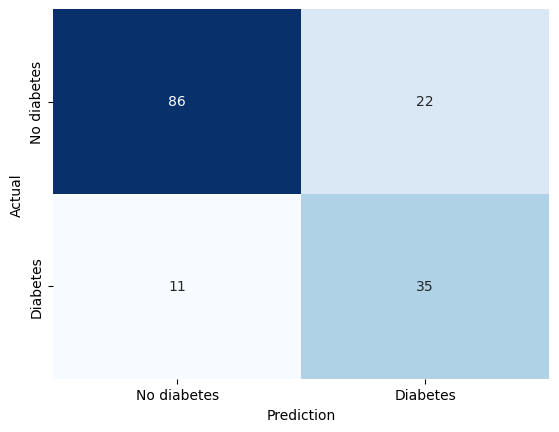

In [43]:
fig, ax1 = plt.subplots()
sns.heatmap(
    data = c_matrix,
    annot=True,
    xticklabels=['No diabetes','Diabetes'],
    yticklabels=['No diabetes','Diabetes'],
    cbar = False,
    cmap='Blues',
    ax = ax1
)

ax1.set_xlabel("Prediction")
ax1.set_ylabel("Actual")
plt.show()

## ROC curve

The ROC curve is a plot with the **True Positive Rate (TPR)** on the $y$ axis and the **False positive Rate (FPR)** on the $x$ axis. TPR and FPR are defined as follows:

$$ \textrm{True positive Rate} = \frac{\textrm{True Positive}}{\textrm{True positive} + \textrm{False Negative}} $$

$$ \textrm{False positive Rate} = \frac{\textrm{False Positive}}{\textrm{True Negative} + \textrm{False Positive}} $$


In [44]:
from sklearn.metrics import roc_curve

In [45]:
y_test_pred_probs = model.predict(X_test)

1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 11ms/step


In [46]:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

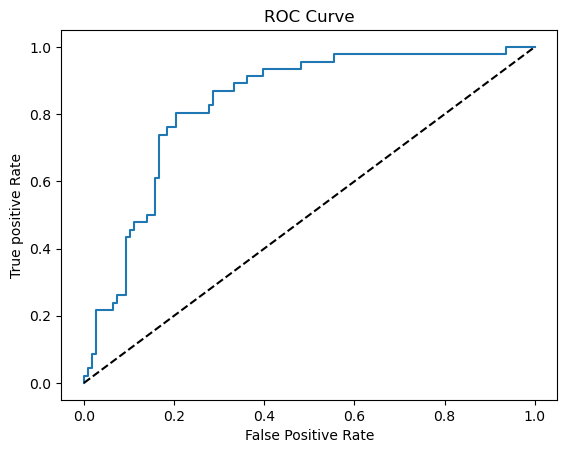

In [47]:
fig, ax = plt.subplots()
ax.plot(FPR, TPR)
ax.plot([0,1],[0,1],
        linestyle='--',
        color='black')
plt.title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True positive Rate')
plt.show()

> we have designed and implemented an MLP that is capable of predicting the onset of diabetes with ~80% accuracy.